In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/houses.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10082 entries, 0 to 10081
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10082 non-null  int64  
 1   Location             10082 non-null  object 
 2   Property type        10082 non-null  object 
 3   Property subtype     10082 non-null  object 
 4   Price                9958 non-null   float64
 5   Type of sale         10082 non-null  object 
 6   Number of bedrooms   9970 non-null   float64
 7   Living area          7750 non-null   float64
 8   Kitchen              9285 non-null   object 
 9   Furnished            7084 non-null   object 
 10  Open fireplace       10082 non-null  bool   
 11  Terrace              10082 non-null  object 
 12  Terrace orientation  10082 non-null  object 
 13  Garden               10082 non-null  object 
 14  Garden orientation   10082 non-null  object 
 15  Surface area land    9970 non-null  

In [5]:
df.head()

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition
0,0,Verviers,HOUSE,HOUSE,296607.0,residential_sale,3.0,130.0,Unknown,False,False,True,Unknown,True,Unknown,239.0,3,NaN,AS_NEW
1,1,Haasdonk,HOUSE,HOUSE,560000.0,residential_sale,4.0,NaN,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,626.0,3,NaN,AS_NEW
2,2,VIANE,HOUSE,HOUSE,299000.0,residential_sale,5.0,200.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,1150.0,NaN,NaN,GOOD
3,3,Gerpinnes,HOUSE,HOUSE,300000.0,residential_sale,0.0,270.0,Unknown,False,False,True,SOUTH,True,SOUTH,498.0,3,False,NaN
4,4,Nivelles,HOUSE,HOUSE,195000.0,residential_sale,3.0,135.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,165.0,2,False,NaN


# Cleaning

## Price cleaning

In [95]:
df['Price'].isna().sum()

0

In [96]:
df = df.dropna(subset=['Price'])
df['Price'].isna().sum()

0

In [99]:
(df['Price']<100).sum()

0

<AxesSubplot:xlabel='Price', ylabel='Count'>

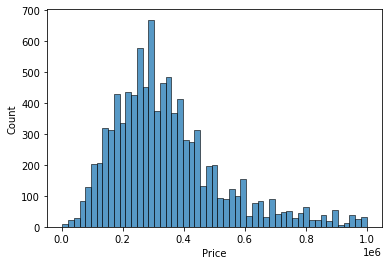

In [100]:
sns.histplot(df[df['Price']<1000000]['Price'])

In [150]:
df['Price_log'] = df['Price'].apply(np.log)

## Exploration of simple data frame

In [15]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition'],
      dtype='object')

In [101]:
df_simple = df[['Surface area land','Living area','Price']]

In [102]:
df_simple.isna().sum()

Surface area land       0
Living area          2219
Price                   0
dtype: int64

In [103]:
df_simple = df_simple.dropna()
df_simple = df_simple[df_simple['Surface area land'] >1]

In [104]:
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 10080
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Surface area land  6987 non-null   float64
 1   Living area        6987 non-null   float64
 2   Price              6987 non-null   float64
dtypes: float64(3)
memory usage: 218.3 KB


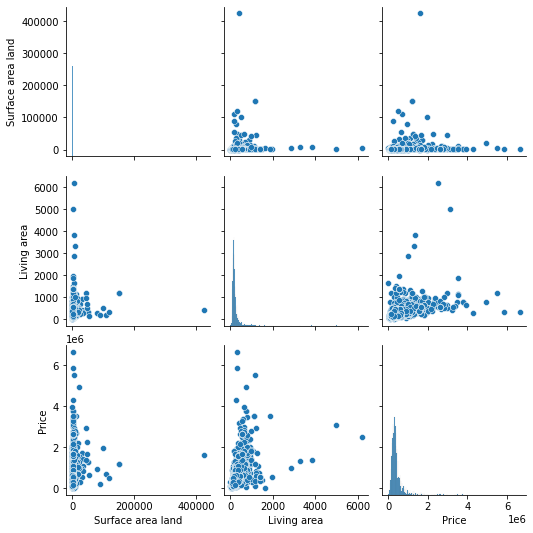

In [105]:
# sns.pairplot(df_simple)

/Users/wvdvijve/.pyenv/versions/3.8.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Surface area land'>

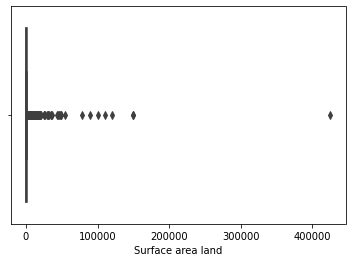

In [106]:
# sns.boxplot(df_simple['Surface area land'])

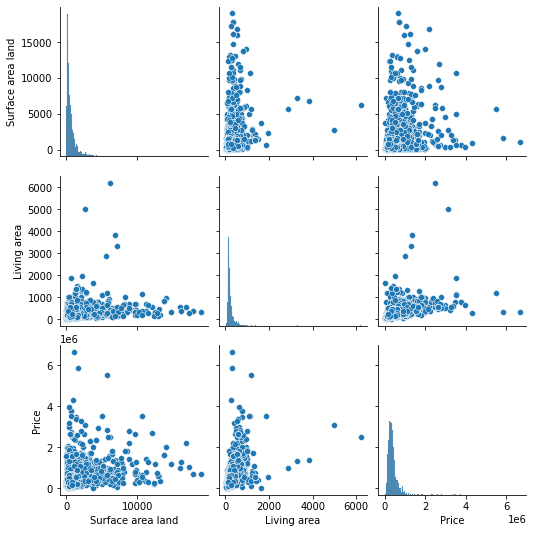

In [61]:
# sns.pairplot(df_simple[df_simple['Surface area land']<20000])

In [108]:
df_simple['Surface_log'] = df_simple['Surface area land'].apply(np.log)
df_simple['Living_log'] = df_simple['Living area'].apply(np.log)
df_simple['Price_log'] = df_simple['Price'].apply(np.log)

In [110]:
df_simple.columns

Index(['Surface area land', 'Living area', 'Price', 'Surface_log',
       'Living_log', 'Price_log'],
      dtype='object')

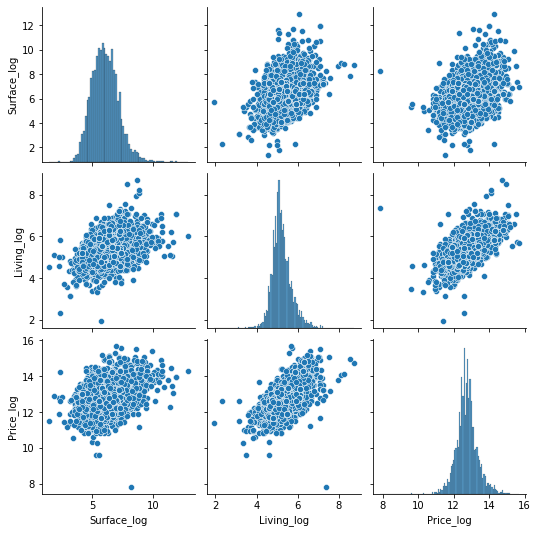

In [111]:
sns.pairplot(df_simple[['Surface_log', 'Living_log',  'Price_log']])

In [123]:
df_simple[['Surface_log', 'Living_log',  'Price_log']].corr()

,Surface_log,Living_log,Price_log
Surface_log,1.000000,0.418617,0.397156
Living_log,0.418617,1.000000,0.669374
Price_log,0.397156,0.669374,1.000000


### Naive linear model

In [116]:
X = df_simple[[ 'Surface area land', 'Living area']]
X_log = df_simple[['Surface_log', 'Living area']]
X_double_log = df_simple[['Surface_log', 'Living_log']]
y = df_simple['Price']
y_log = df_simple['Price_log']

In [113]:
np.log

2.302585092994046

In [66]:
from sklearn.model_selection import train_test_split



def easy_modeler(X, y , model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    this_model = model()
    this_model.fit(X_train, y_train)

    train_score =this_model.score(X_train, y_train)
    test_score =this_model.score(X_test, y_test)

    print(f'The train score is {train_score}')
    print(f'The test score is {test_score}')


In [89]:
easy_modeler(X,y, LinearRegression)

The train score is 0.25686334815642997
The test score is 0.11364231474742648


In [90]:
easy_modeler(X_log, y, LinearRegression)

The train score is 0.2944758917163226
The test score is 0.3341018664540255


In [124]:
easy_modeler(X_double_log, y_log , LinearRegression)

The train score is 0.45856624526829337
The test score is 0.48874420348786396


In [119]:
from sklearn.ensemble import RandomForestRegressor

easy_modeler(X, y, RandomForestRegressor)

The train score is 0.9175294569653237
The test score is 0.3774340075268413


In [118]:
easy_modeler(X_double_log, y_log, RandomForestRegressor)

The train score is 0.9012912040129657
The test score is 0.46533164530809834


In [120]:
easy_modeler(X_double_log, y, RandomForestRegressor)

The train score is 0.9127446880364359
The test score is 0.5069091081780266


In [121]:
from sklearn.svm import SVR

easy_modeler(X, y, SVR)

The train score is -0.05715584602885482
The test score is -0.04932135769131518


In [122]:
easy_modeler(X_double_log, y_log, SVR)

The train score is 0.4982969073698277
The test score is 0.4727976848986897


## Exploration of number of bedrooms

In [126]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition'],
      dtype='object')

In [163]:
df_bedrooms = df[['Number of bedrooms', 'Price', 'Price_log']]

In [165]:
df_bedrooms.isna().sum()

Number of bedrooms    0
Price                 0
Price_log             0
dtype: int64

9958

In [185]:

df_bedrooms = df_bedrooms[(df_bedrooms['Number of bedrooms']<40)]
df_bedrooms = df_bedrooms[df_bedrooms['Number of bedrooms']>=1]

<AxesSubplot:xlabel='Number of bedrooms', ylabel='Price'>

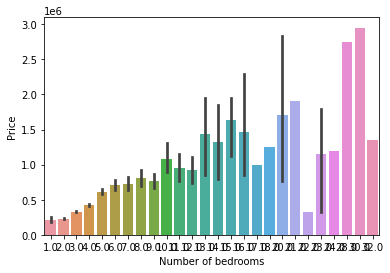

In [186]:
sns.barplot(data=df_bedrooms, x='Number of bedrooms', y='Price')

In [187]:
df_bedrooms.describe()

,Number of bedrooms,Price,Price_log
count,9749.000000,9.749000e+03,9749.000000
mean,3.534414,3.913240e+05,12.673016
std,1.659076,3.333420e+05,0.616469
min,1.000000,2.500000e+03,7.824046
25%,3.000000,2.250000e+05,12.323856
50%,3.000000,3.195000e+05,12.674513
75%,4.000000,4.400000e+05,12.994530
max,32.000000,6.650000e+06,15.710127


In [159]:
df[df['Number of bedrooms']==0]

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
3,3,Gerpinnes,HOUSE,HOUSE,300000.0,residential_sale,0.0,270.0,Unknown,False,False,True,SOUTH,True,SOUTH,498.0,3,False,NaN,12.611538
59,59,Liège,HOUSE,APARTMENT_BLOCK,1550000.0,residential_sale,0.0,500.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,0.0,2,NaN,AS_NEW,14.253765
76,76,Zeebrugge,HOUSE,HOUSE,388000.0,residential_sale,0.0,NaN,Unknown,False,False,Unknown,Unknown,Unknown,Unknown,0.0,2,False,NaN,12.868761
144,144,Attert (Heinstert,HOUSE,FARMHOUSE,950000.0,residential_sale,0.0,250.0,Unknown,True,False,Unknown,Unknown,Unknown,Unknown,78987.0,4,False,NaN,13.764217
395,395,SINT-JANS-MOLENBEEK,HOUSE,MIXED_USE_BUILDING,795000.0,residential_sale,0.0,650.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,650.0,3,NaN,GOOD,13.586097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9944,Oudenaarde,HOUSE,APARTMENT_BLOCK,439500.0,residential_sale,0.0,180.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,60.0,2,False,AS_NEW,12.993393
9973,9973,Oudenaarde,HOUSE,APARTMENT_BLOCK,439500.0,residential_sale,0.0,180.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,60.0,2,False,AS_NEW,12.993393
10002,10002,Oudenaarde,HOUSE,APARTMENT_BLOCK,439500.0,residential_sale,0.0,180.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,60.0,2,False,AS_NEW,12.993393
10035,10035,Oudenaarde,HOUSE,APARTMENT_BLOCK,439500.0,residential_sale,0.0,180.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,60.0,2,False,AS_NEW,12.993393


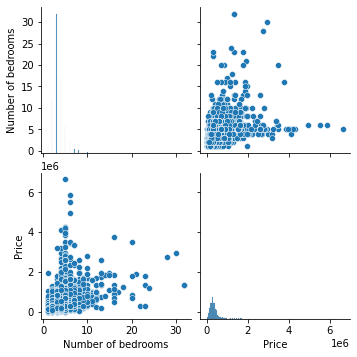

In [188]:
sns.pairplot(df_bedrooms[['Number of bedrooms', 'Price']])

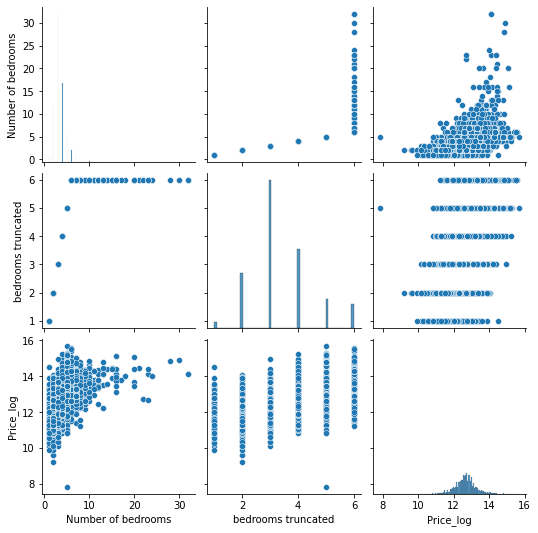

In [195]:
sns.pairplot(df_bedrooms[['Number of bedrooms', 'bedrooms truncated', 'Price_log']])

In [196]:
df_bedrooms.corr()

,Number of bedrooms,Price,Price_log,bedrooms truncated
Number of bedrooms,1.000000,0.448159,0.456434,0.841414
Price,0.448159,1.000000,0.825792,0.433637
Price_log,0.456434,0.825792,1.000000,0.495881
bedrooms truncated,0.841414,0.433637,0.495881,1.000000


In [194]:
df_bedrooms['bedrooms truncated'] = df_bedrooms['Number of bedrooms'].apply(lambda x: x if x<6 else 6)

### Naive bedroom models

In [197]:
X= df_bedrooms[['Number of bedrooms']]
X_trunc = df_bedrooms[['bedrooms truncated']]
y = df_bedrooms['Price']
y_log = df_bedrooms['Price_log']

In [199]:
easy_modeler(X,y, LinearRegression)
easy_modeler(X,y_log, LinearRegression)

The train score is 0.2143201016576637
The test score is 0.1505234905928312
The train score is 0.2086096432992719
The test score is 0.2071075453754011


In [200]:
easy_modeler(X_trunc,y, LinearRegression)
easy_modeler(X_trunc,y_log, LinearRegression)

The train score is 0.188179422410103
The test score is 0.1873525315205492
The train score is 0.2507612556156663
The test score is 0.22531097670926026


In [201]:
easy_modeler(X,y, RandomForestRegressor)
easy_modeler(X,y_log, RandomForestRegressor)

The train score is 0.22797723008477244
The test score is 0.19897945814471074
The train score is 0.25754195919999523
The test score is 0.2635896301821228


In [202]:
easy_modeler(X_trunc,y, RandomForestRegressor)
easy_modeler(X_trunc,y_log, RandomForestRegressor)

The train score is 0.1973950764513478
The test score is 0.20126119021714894
The train score is 0.25791905563953477
The test score is 0.22348204125626658


## Exploration of property type and sub-type

In [203]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition', 'Price_log'],
      dtype='object')

In [206]:
df_property = df[['Property type', 'Property subtype', 'Price', 'Price_log']]

In [207]:
df_property['Property type'].unique()

array(['HOUSE'], dtype=object)

In [214]:
list_subtypes = list(df_property['Property subtype'].unique())
list_subtypes

['HOUSE',
 'VILLA',
 'APARTMENT_BLOCK',
 'MIXED_USE_BUILDING',
 'MANSION',
 'TOWN_HOUSE',
 'FARMHOUSE',
 'BUNGALOW',
 'EXCEPTIONAL_PROPERTY',
 'COUNTRY_COTTAGE',
 'MANOR_HOUSE',
 'CHALET',
 'CASTLE',
 'OTHER_PROPERTY']

In [249]:
df_property.groupby('Property subtype').count()

,Property type,Price,Price_log
Property subtype,,,
APARTMENT_BLOCK,509,509,509
BUNGALOW,100,100,100
CASTLE,8,8,8
CHALET,35,35,35
COUNTRY_COTTAGE,80,80,80
EXCEPTIONAL_PROPERTY,129,129,129
FARMHOUSE,31,31,31
HOUSE,7585,7585,7585
MANOR_HOUSE,22,22,22


In [210]:
df_property['Property subtype'].isna().sum()

0

<AxesSubplot:xlabel='Price', ylabel='Property subtype'>

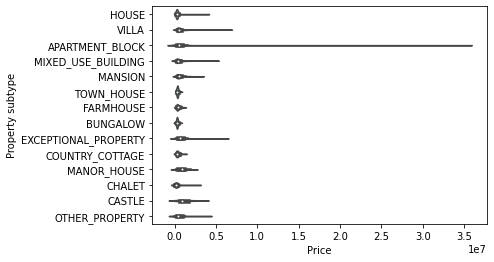

In [212]:
sns.violinplot(data = df_property, y='Property subtype', x='Price' )

<AxesSubplot:xlabel='Price_log', ylabel='Property subtype'>

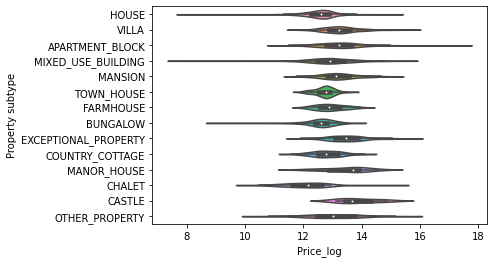

In [213]:
sns.violinplot(data = df_property, y='Property subtype', x='Price_log' )

<AxesSubplot:xlabel='Price_log', ylabel='Count'>

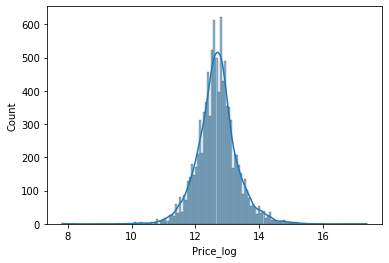

In [217]:
sns.histplot(df_property['Price_log'], kde=True)

In [238]:
def plot_subtype(subtype):
    sns.histplot(df_property[df_property['Property subtype']==subtype]['Price_log'],kde=True)
    plt.title(subtype)

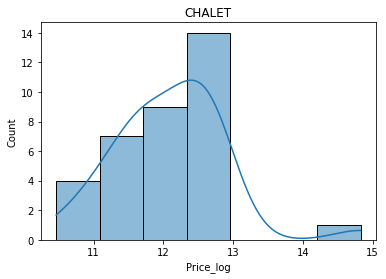

In [245]:
plot_subtype(list_subtypes[11])

In [250]:
df_property_dummies = pd.get_dummies(df_property['Property subtype'])

In [251]:
df_property_dummies

,APARTMENT_BLOCK,BUNGALOW,CASTLE,CHALET,COUNTRY_COTTAGE,EXCEPTIONAL_PROPERTY,FARMHOUSE,HOUSE,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,TOWN_HOUSE,VILLA
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10078,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10079,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10080,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### naive property model

In [255]:
X = df_property_dummies
y = df_property['Price']
y_log = df_property['Price_log']

In [259]:
easy_modeler(X, y, LinearRegression)
easy_modeler(X, y_log, LinearRegression)

The train score is 0.09620975081470784
The test score is 0.199586262497485
The train score is 0.1896414572502093
The test score is 0.2055688879029418


In [260]:
easy_modeler(X, y, RandomForestRegressor)
easy_modeler(X, y_log, RandomForestRegressor)

The train score is 0.09377748391276386
The test score is 0.2167756615334061
The train score is 0.1945094136573552
The test score is 0.18679921592782034


In [263]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [262]:
easy_modeler(X, y, Lasso)
easy_modeler(X, y_log, Lasso)

The train score is 0.09722073458887792
The test score is 0.18053372651591615
The train score is 0.0
The test score is -0.00010799598420851986


In [264]:
easy_modeler(X, y, Ridge)
easy_modeler(X, y_log, Ridge)

The train score is 0.09437623391071659
The test score is 0.2012457982347401
The train score is 0.18465900155795156
The test score is 0.22699991440085943


In [266]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition', 'Price_log'],
      dtype='object')

## Exploration of location

In [268]:
len(df['Location'].unique())

2104

In [276]:
df[['Location', 'Property type']].groupby('Location').count().sort_values(by='Property type', ascending=False)

,Property type
Location,
Gent,140
Antwerp,126
Aalst,91
Brugge,85
Roeselare,76
...,...
Kieldrecht,1
Kerkom,1
Kemmel,1


In [277]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition', 'Price_log'],
      dtype='object')

# Combined Model

In [326]:
from sklearn.metrics import r2_score

def r2_exp(y_true, y_pred):
    return r2_score(np.exp(y_true), np.exp(y_pred))

In [280]:
df_1 = df_simple[['Surface_log', 'Living_log']]
df_2 = df_bedrooms[['Number of bedrooms']]
df_3 = df_property_dummies
df_target = df[['Price', 'Price_log']]

df_final = df_1.join(df_2, how='inner')
df_final = df_final.join(df_3, how='inner')
df_final = df_final.join(df_target, how='inner')

X = df_final.drop(columns=['Price', 'Price_log'])
y = df_final['Price_log']

In [283]:
easy_modeler(X,y, LinearRegression)

The train score is 0.5033507774893904
The test score is 0.5228743897173753


In [284]:
easy_modeler(X,y, Ridge)

The train score is 0.5053196832128043
The test score is 0.51963583783797


In [287]:
easy_modeler(X,y, RandomForestRegressor)

The train score is 0.9217701520064143
The test score is 0.5201812693640246


## Ridge and lasso

In [333]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

from sklearn.linear_model import LinearRegression

ridge = LinearRegression()
ridge.fit(X_train, y_train)

train_score =ridge.score(X_train, y_train)
test_score =ridge.score(X_test, y_test)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')



The train score is 0.5089233292060944
The test score is 0.504948019461976


In [336]:
y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print(r2_exp(y_train_pred, y_train))
print(r2_exp(y_pred, y_test))

-0.5154705790370295
-0.37561461283388575


In [341]:
np.exp(np.abs(np.log(np.exp(y_pred)/np.exp(y_test))).mean())

1.3663289153349851

## Random forest regressor

In [298]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=76)

In [299]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [10,100,1000],
    'max_depth': [2,20,50,100],
    'min_samples_split': [2,10,50],
    'min_samples_leaf': [1,5,20],
}

model = RandomForestRegressor(n_jobs=-1)
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.6402050080337887
The test score is 0.5436180360741498


In [300]:
clf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'n_estimators': 100}

In [302]:
import joblib

best_model = clf.best_estimator_

In [311]:
joblib.dump(best_model, './model/best_model')

['./model/best_model']

In [312]:
np.exp(best_model.predict(X_test.iloc[1000:1005]))

array([293566.30023846, 438231.33452698, 359504.09698162, 267468.75866183,
       197110.18200902])

In [314]:
df.loc[X_test.iloc[1000:1005].index]

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
9035,9035,Uccle,HOUSE,HOUSE,430000.0,residential_sale,4.0,160.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,91.0,2,NaN,GOOD,12.971540
7279,7279,Wommelgem,HOUSE,HOUSE,699000.0,residential_sale,4.0,269.0,INSTALLED,False,False,Unknown,Unknown,True,NORTH_WEST,1778.0,4,NaN,GOOD,13.457406
365,365,Oudenburg,HOUSE,HOUSE,310000.0,residential_sale,3.0,241.0,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,839.0,Unknown,False,Unknown,12.644328
3855,3855,St-Amandsberg,HOUSE,HOUSE,219000.0,residential_sale,4.0,155.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,80.0,2,NaN,TO_RENOVATE,12.296827
752,752,Lembeek,HOUSE,HOUSE,360000.0,residential_sale,2.0,92.0,INSTALLED,NaN,False,True,Unknown,Unknown,Unknown,2971.0,4,NaN,NaN,12.793859


In [348]:
y_pred = np.exp(best_model.predict(X_test))
y_true = df_final.loc[X_test.index]['Price']

In [322]:
y_pred

array([324416.04705846, 198133.41656107, 274320.04282725, ...,
       385882.70657537, 341183.33929211, 281026.19038773])

In [324]:
y_true

4905     425000.0
6771     190000.0
3085     425000.0
8650     229900.0
7218     235000.0
          ...    
4561    1300000.0
6518     235000.0
6924     445000.0
5054     429000.0
2560     249500.0
Name: Price, Length: 1382, dtype: float64

In [373]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.586322432868781

In [352]:
np.abs(y_pred/y_true - 1).mean()

0.299473780986224

In [376]:
worst = (y_pred/y_true).sort_values()[-20:]
worst_down = (y_pred/y_true).sort_values(ascending=False)[-20:]

In [372]:
df.loc[worst.index]

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
3992,3992,Beauraing,HOUSE,HOUSE,119000.0,residential_sale,4.0,165.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,120.0,2,False,TO_BE_DONE_UP,11.686879
9395,9395,Ninove,HOUSE,MIXED_USE_BUILDING,110000.0,residential_sale,2.0,149.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,129.0,2,False,TO_RENOVATE,11.608236
6241,6241,Manage,HOUSE,HOUSE,70000.0,residential_sale,2.0,95.0,INSTALLED,NaN,False,Unknown,Unknown,Unknown,Unknown,46.0,2,NaN,TO_RENOVATE,11.156251
3150,3150,Chatelineau,HOUSE,APARTMENT_BLOCK,375000.0,residential_sale,4.0,533.0,INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,165.0,2,NaN,NaN,12.834681
2446,2446,Graide,HOUSE,HOUSE,100000.0,residential_sale,4.0,140.0,INSTALLED,False,False,Unknown,Unknown,True,EAST,692.0,3,NaN,TO_RENOVATE,11.512925
2990,2990,Villers-la-Ville,HOUSE,HOUSE,120000.0,residential_sale,2.0,1189.0,Unknown,False,False,Unknown,Unknown,True,SOUTH_WEST,1189.0,3,False,TO_RENOVATE,11.695247
7748,7748,Paliseul,HOUSE,HOUSE,130000.0,residential_sale,4.0,250.0,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,1750.0,4,NaN,TO_RENOVATE,11.775290
9278,9278,HAININ,HOUSE,HOUSE,100000.0,residential_sale,3.0,179.0,SEMI_EQUIPPED,NaN,False,Unknown,Unknown,True,Unknown,202.0,2,NaN,NaN,11.512925
4990,4990,Charleroi,HOUSE,HOUSE,100000.0,residential_sale,4.0,160.0,Unknown,False,False,Unknown,Unknown,Unknown,Unknown,90.0,2,NaN,TO_RENOVATE,11.512925
9885,9885,Olloy-sur-Viroin,HOUSE,HOUSE,158000.0,residential_sale,3.0,500.0,SEMI_EQUIPPED,False,False,True,Unknown,True,Unknown,1613.0,3,NaN,NaN,11.970350


In [377]:
df.loc[worst_down.index]

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition,Price_log
4585,4585,Kapellen,HOUSE,VILLA,935000.0,residential_sale,4.0,141.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,6723.0,4,True,TO_RENOVATE,13.748302
472,472,Auderghem,HOUSE,HOUSE,665000.0,residential_sale,4.0,170.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,90.0,2,NaN,NaN,13.407542
7938,7938,Uccle,HOUSE,HOUSE,399000.0,residential_sale,3.0,88.0,SEMI_EQUIPPED,False,False,True,Unknown,Unknown,Unknown,53.0,2,False,GOOD,12.896717
7827,7827,Rhode-Saint-Genèse,HOUSE,EXCEPTIONAL_PROPERTY,3250000.0,residential_sale,5.0,545.0,USA_HYPER_EQUIPPED,NaN,False,True,Unknown,True,Unknown,2003.0,4,True,AS_NEW,14.994166
9187,9187,Hoeilaart,HOUSE,HOUSE,785000.0,residential_sale,2.0,185.0,INSTALLED,False,False,True,Unknown,True,Unknown,639.0,4,NaN,JUST_RENOVATED,13.573439
4055,4055,Uccle,HOUSE,HOUSE,685000.0,residential_sale,4.0,170.0,INSTALLED,NaN,False,True,Unknown,Unknown,Unknown,250.0,3,False,GOOD,13.437174
3806,3806,Woluwe-Saint-Lambert,HOUSE,HOUSE,520000.0,residential_sale,3.0,130.0,USA_INSTALLED,False,False,Unknown,Unknown,Unknown,Unknown,102.0,2,False,AS_NEW,13.161584
3298,3298,Knokke-Heist,HOUSE,HOUSE,795000.0,residential_sale,3.0,170.0,HYPER_EQUIPPED,False,False,True,Unknown,Unknown,Unknown,276.0,2,False,AS_NEW,13.586097
5531,5531,Woluwe-Saint-Pierre,HOUSE,EXCEPTIONAL_PROPERTY,3380000.0,residential_sale,7.0,600.0,HYPER_EQUIPPED,False,False,True,Unknown,Unknown,Unknown,1390.0,4,True,AS_NEW,15.033386
5630,5630,Deurle,HOUSE,HOUSE,585000.0,residential_sale,2.0,161.0,NaN,False,False,True,Unknown,True,SOUTH_EAST,645.0,3,False,AS_NEW,13.279367


In [370]:
np.exp(best_model.predict(X_test.loc[worst.index]))

array([237504.50799666, 260530.53934938, 259511.32594723, 502617.97506815,
       332694.17880939, 439568.58529327, 316631.69805399, 352690.43687276,
       248295.57118924, 253454.084718  ])